In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib import gridspec
import datetime as dt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import urllib
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


In [2]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
za_objavo = yesterday.strftime('%d-%m-%y')
yesterday = yesterday.strftime('%d%m%Y')
print(yesterday)
dls = 'https://www.nijz.si/sites/www.nijz.si/files/uploaded/porocilo_stevilo_potrjenih_primerov_covid-19_'+yesterday+'_splet.xlsx'
urllib.request.urlretrieve(dls, "covid_data.xlsx")

10112020


('covid_data.xlsx', <http.client.HTTPMessage at 0x2bc0fec6848>)

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
print(za_objavo)

10-11-20


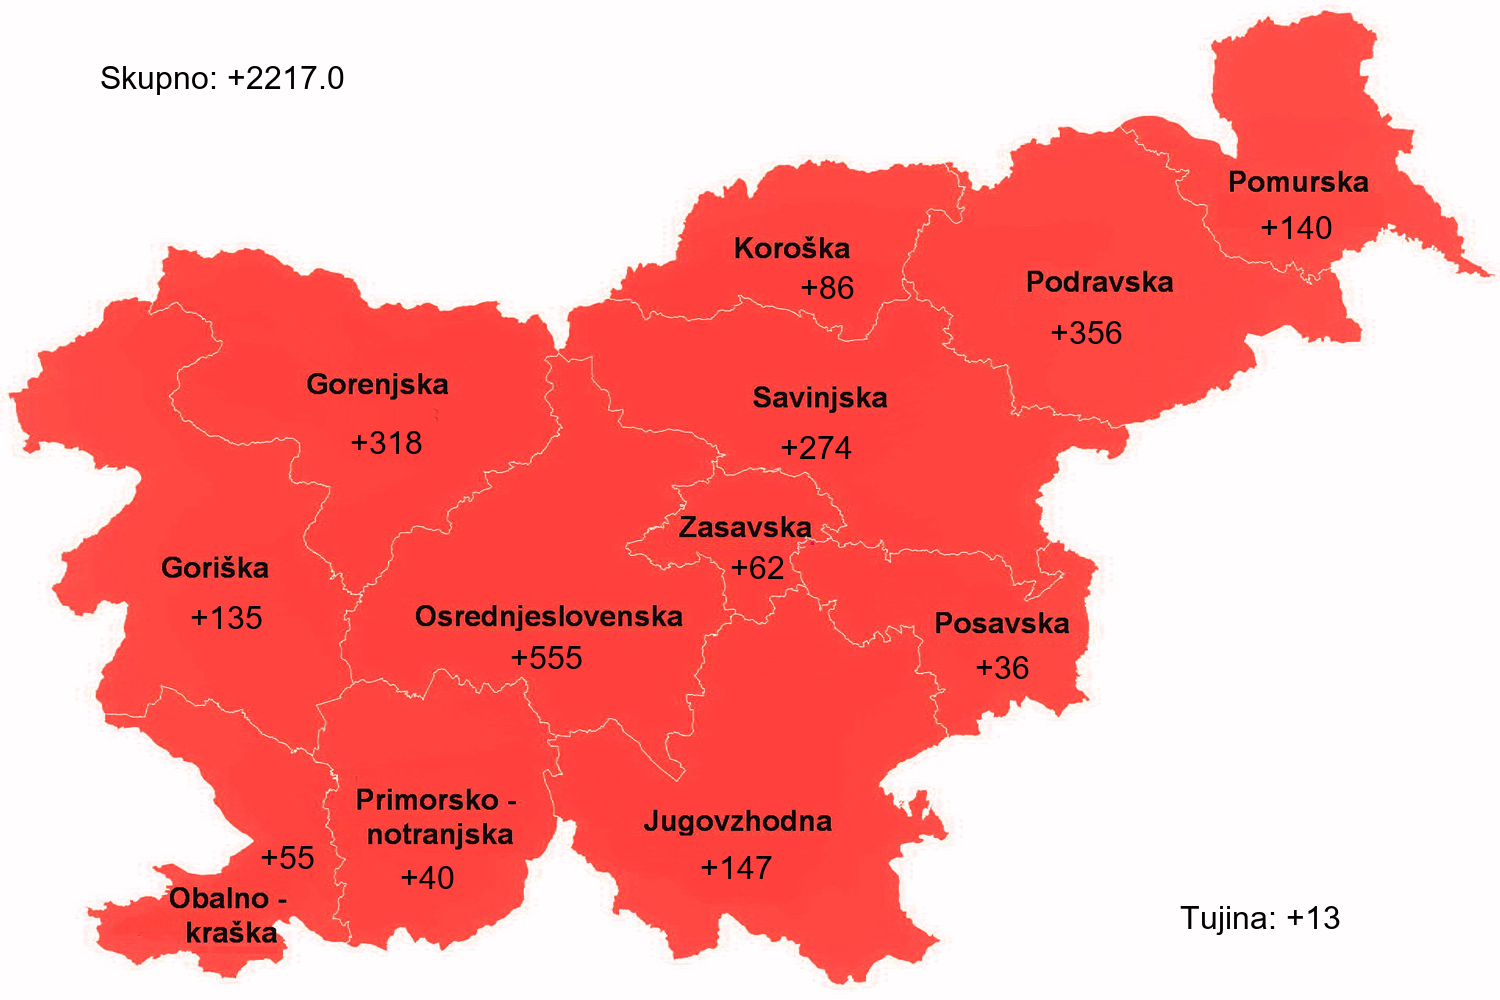

In [5]:
from IPython.display import display, HTML

df = pd.read_excel('covid_data.xlsx',sheet_name='tb3')
df = df.fillna(0)
df = df.tail(2)
df.drop(df.tail(1).index,inplace=True)
df = df.rename(columns={'Unnamed: 1': 'Pomurska', 'Unnamed: 2': 'Podravska', 'Unnamed: 3': 'Koroška', 'Unnamed: 4': 'Savinjska','Unnamed: 5': 'Zasavska', 'Unnamed: 6': 'Posavska', 'Unnamed: 7':'Jugovzhodna Slovenija','Unnamed: 8':'Primorsko-notranjska','Unnamed: 9':'Osrednjeslovenska', 'Unnamed: 10':'Gorenjska','Unnamed: 11':'Goriška','Unnamed: 12': 'Obalno-kraška','Unnamed: 13':'Tujina', 'Unnamed: 14':'Skupno' })
df = df.drop(['Dnevno število potrjenih primerov po statističnih regijah'], axis=1)
df = df.reset_index()
df = df.drop(['index'],axis=1)
df = df.apply(pd.to_numeric)


from IPython.display import Image
from PIL import Image               # to load images
from IPython.display import display # to display images
from IPython.core.display import HTML 
from PIL import ImageFont
from PIL import ImageDraw
from PIL import Image
import requests
from io import BytesIO
url = 'https://www.avtokampi.si/slika/statisticne-rdece-regije.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("arial.ttf", 32)
draw.text((350, 425),'+'+str(df.iloc[0,9]),(0,0,0), font=font)
draw.text((1050, 315),'+'+str(df.iloc[0,1]),(0,0,0), font=font)
draw.text((1260, 210),'+'+str(df.iloc[0,0]),(0,0,0), font=font)
draw.text((800, 270),'+'+str(df.iloc[0,2]),(0,0,0), font=font)
draw.text((780, 430),'+'+str(df.iloc[0,3]),(0,0,0), font=font)
draw.text((975, 650),'+'+str(df.iloc[0,5]),(0,0,0), font=font)
draw.text((510, 640),'+'+str(df.iloc[0,8]),(0,0,0), font=font)
draw.text((190, 600),'+'+str(df.iloc[0,10]),(0,0,0), font=font)
draw.text((700, 850),'+'+str(df.iloc[0,6]),(0,0,0), font=font)
draw.text((400, 860),'+'+str(df.iloc[0,7]),(0,0,0), font=font)
draw.text((730, 550),'+'+str(df.iloc[0,4]),(0,0,0), font=font)
draw.text((260, 840),'+'+str(df.iloc[0,11]),(0,0,0), font=font)
draw.text((1180, 900),'Tujina: ''+'+str(df.iloc[0,12]),(0,0,0), font=font)
draw.text((100, 60),'Skupno: ''+'+str(df.iloc[0,13]),(0,0,0), font=font)
display(img)

<h1 align="center">Deset občin z najvišjim številom novih primerov v zadnjih 14 dneh</h1> 

In [6]:
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

df = pd.read_excel('covid_data.xlsx', sheet_name='tb2')
df = df.fillna(0)
st = len(df.columns)
dfr = df.iloc[:,st-16:st-2]
res = pd.concat([dfr, df['Dnevno število potrjenih primerov po občinah']], axis=1)
column_list = []
for col in res.columns: 
    column_list.append(col)
column_list = column_list[:-1]

zadnji_dan = column_list[-1]
res.drop(res.head(1).index,inplace=True)
res[column_list] = res[column_list].apply(pd.to_numeric)
res['Št. pozitivnih'] = res[column_list].sum(axis=1)
res.drop(res.tail(1).index,inplace=True)
konc = res[['Dnevno število potrjenih primerov po občinah', 'Št. pozitivnih',zadnji_dan]]
konc.sort_values(by=['Št. pozitivnih'], inplace=True, ascending=False)
konc = konc.reset_index()
konc = konc.drop(['index'], axis=1)
konc = konc.rename(columns={'Dnevno število potrjenih primerov po občinah': 'Občina:',zadnji_dan: 'Število novopotrjenih okužb'})
konc.head(10)

,Občina:,Št. pozitivnih,Število novopotrjenih okužb
0,Ljubljana,2915,267
1,Maribor,933,94
2,Kranj,908,67
3,Velenje,445,59
4,Domžale,433,43
5,Kamnik,419,44
6,Celje,383,30
7,Slovenska Bistrica,364,71
8,Škofja Loka,362,32
9,Novo mesto,352,66



<h1><center>Dnevno število pozitivnih</center></h1>

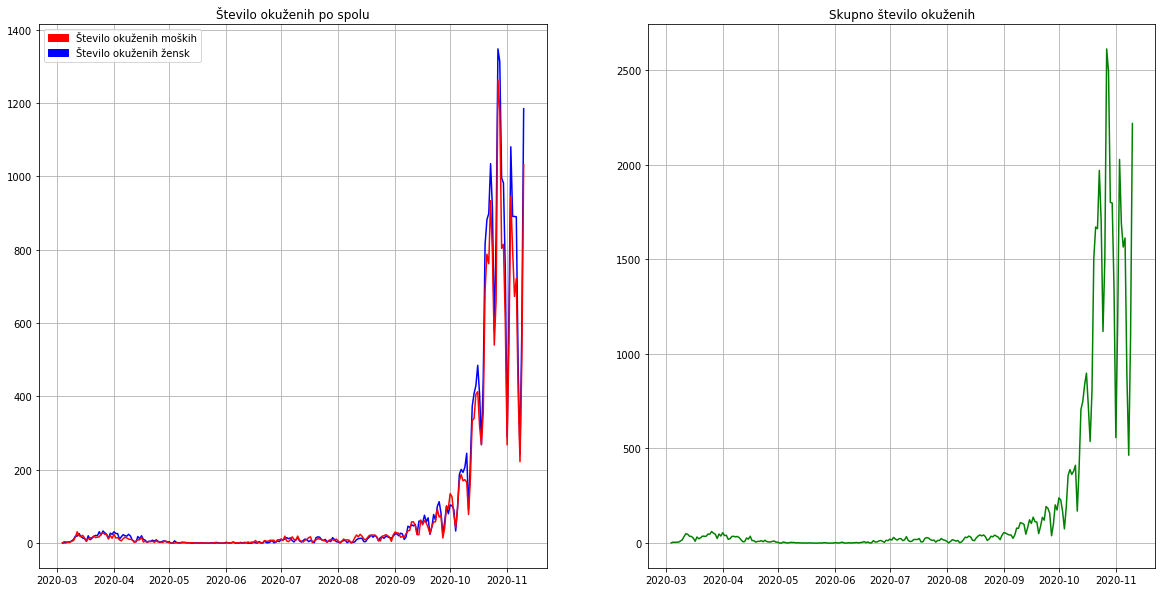

In [7]:
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))


df = pd.read_excel('covid_data.xlsx', sheet_name='tb1')
df = df.fillna(0)
dfv = df.loc[:,['Dnevno število opravljenih testiranj in število pozitivnih','Unnamed: 1','Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']]
dfv.drop(dfv.head(3).index,inplace=True)
dfv = dfv.reset_index()
dfv = dfv.drop(['index'], axis=1)
dfv = dfv.rename(columns={'Dnevno število opravljenih testiranj in število pozitivnih':'Datum','Unnamed: 1': 'Število opravljenih testov', 'Unnamed: 5': 'Potrjeni - moški', 'Unnamed: 6': 'Potrjeni - Ženske', 'Unnamed: 7': 'Potrjeni - Skupaj'})
dfv['Datum']=pd.to_datetime(dfv['Datum'].astype(str), format='%Y-%m-%d %H:%M:%S')
x = dfv['Datum']
ym = dfv['Potrjeni - moški']
yz = dfv['Potrjeni - Ženske']
ys = dfv['Potrjeni - Skupaj']

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(10)
fig.set_figwidth(20)


blue_patch = mpatches.Patch(color='blue', label='Število okuženih žensk')
red_patch = mpatches.Patch(color='red', label='Število okuženih moških')
ax1.legend(handles=[red_patch, blue_patch])



ax1.title.set_text('Število okuženih po spolu')
ax2.title.set_text('Skupno število okuženih')


ax1.plot(x, yz, 'b')  
ax1.plot(x, ym, 'r') 
ax1.grid()

ax2.plot(x, ys, 'g')  
ax2.grid()


<h1><center>Dnevno število potrjenih primerov po spolu in starostnih skupinah</center></h1>

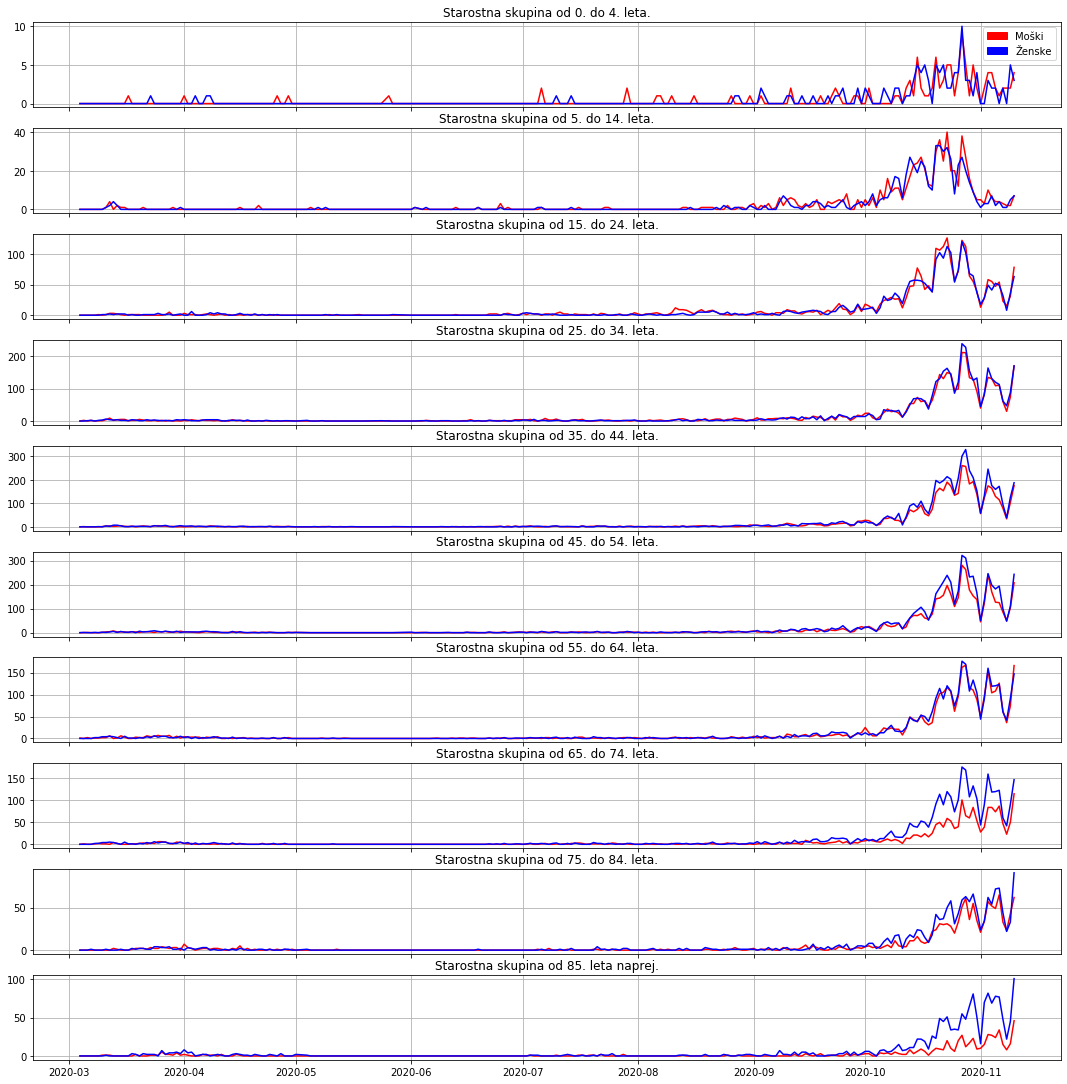

In [8]:
df = pd.read_excel('covid_data.xlsx', sheet_name='tb4')
df = df.fillna(0)
df.drop(df.head(2).index,inplace=True)
df.drop(df.tail(1).index,inplace=True)
df = df.rename(columns={'Dnevno število potrjenih primerov po spolu in starostnih skupinah': 'Datum'})
df['Datum']=pd.to_datetime(df['Datum'].astype(str), format='%Y-%m-%d %H:%M:%S')
x = df['Datum']

#Moški
df = pd.read_excel('covid_data.xlsx', sheet_name='tb4')
df = df.fillna(0)
dfm = df.loc[:,'Unnamed: 1':'Unnamed: 10']
dfm.drop(dfm.tail(1).index,inplace=True)
dfm.drop(dfm.head(1).index,inplace=True)
dfm.drop(dfm.head(1).index, inplace=True)
dfm[['Unnamed: 1','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5','Unnamed: 6', 'Unnamed: 7','Unnamed: 8', 'Unnamed: 9','Unnamed: 10']] = dfm[['Unnamed: 1','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5','Unnamed: 6', 'Unnamed: 7','Unnamed: 8', 'Unnamed: 9','Unnamed: 10']].astype('int64')
dfm['sum4'] = dfm['Unnamed: 1'].cumsum()
dfm['sum14'] = dfm['Unnamed: 2'].cumsum()
dfm['sum24'] = dfm['Unnamed: 3'].cumsum()
dfm['sum34'] = dfm['Unnamed: 4'].cumsum()
dfm['sum44'] = dfm['Unnamed: 5'].cumsum()
dfm['sum54'] = dfm['Unnamed: 6'].cumsum()
dfm['sum64'] = dfm['Unnamed: 7'].cumsum()
dfm['sum74'] = dfm['Unnamed: 8'].cumsum()
dfm['sum84'] = dfm['Unnamed: 9'].cumsum()
dfm['sum85'] = dfm['Unnamed: 10'].cumsum()
y4 = dfm['Unnamed: 1']
y14 = dfm['Unnamed: 2']
y24 = dfm['Unnamed: 3']
y34 = dfm['Unnamed: 4']
y44 = dfm['Unnamed: 5']
y54 = dfm['Unnamed: 6']
y64 = dfm['Unnamed: 7']
y74 = dfm['Unnamed: 8']
y84 = dfm['Unnamed: 9']
y85 = dfm['Unnamed: 10']

df = pd.read_excel('covid_data.xlsx', sheet_name='tb4')
df = df.fillna(0)
dfz = df.loc[:,'Unnamed: 12':'Unnamed: 22']
dfz.drop(dfz.tail(1).index,inplace=True)
dfz.drop(dfz.head(1).index,inplace=True)
dfz.drop(dfz.head(1).index, inplace=True)
dfz[['Unnamed: 22','Unnamed: 12','Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16','Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20','Unnamed: 21']] = dfz[['Unnamed: 21','Unnamed: 22','Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15','Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19','Unnamed: 20']].astype('int64')
dfz['sum4'] = dfz['Unnamed: 13'].cumsum()
dfz['sum14'] = dfz['Unnamed: 14'].cumsum()
dfz['sum24'] = dfz['Unnamed: 15'].cumsum()
dfz['sum34'] = dfz['Unnamed: 16'].cumsum()
dfz['sum44'] = dfz['Unnamed: 17'].cumsum()
dfz['sum54'] = dfz['Unnamed: 18'].cumsum()
dfz['sum64'] = dfz['Unnamed: 19'].cumsum()
dfz['sum74'] = dfz['Unnamed: 20'].cumsum()
dfz['sum84'] = dfz['Unnamed: 21'].cumsum()
dfz['sum85'] = dfz['Unnamed: 22'].cumsum()
yz4 = dfz['Unnamed: 13']
yz14 = dfz['Unnamed: 14']
yz24 = dfz['Unnamed: 15']
yz34 = dfz['Unnamed: 16']
yz44 = dfz['Unnamed: 17']
yz54 = dfz['Unnamed: 18']
yz64 = dfz['Unnamed: 19']
yz74 = dfz['Unnamed: 19']
yz84 = dfz['Unnamed: 20']
yz85 = dfz['Unnamed: 21']


#Grafi
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, 1, sharex='col')

fig.set_figheight(15)
fig.set_figwidth(15)
fig.tight_layout()



blue_patch = mpatches.Patch(color='blue', label='Ženske')
red_patch = mpatches.Patch(color='red', label='Moški')
ax1.legend(handles=[red_patch,blue_patch])

ax1.title.set_text('Starostna skupina od 0. do 4. leta.')
ax2.title.set_text('Starostna skupina od 5. do 14. leta.')
ax3.title.set_text('Starostna skupina od 15. do 24. leta.')
ax4.title.set_text('Starostna skupina od 25. do 34. leta.')
ax5.title.set_text('Starostna skupina od 35. do 44. leta.')
ax6.title.set_text('Starostna skupina od 45. do 54. leta.')
ax7.title.set_text('Starostna skupina od 55. do 64. leta.')
ax8.title.set_text('Starostna skupina od 65. do 74. leta.')
ax9.title.set_text('Starostna skupina od 75. do 84. leta.')
ax10.title.set_text('Starostna skupina od 85. leta naprej.')

ax1.plot(x, y4, 'r')
ax1.plot(x, yz4, 'b') 
ax1.grid()
ax2.plot(x, y14, 'r') 
ax2.plot(x, yz14, 'b') 
ax2.grid()
ax3.plot(x, y24, 'r')
ax3.plot(x, yz24, 'b') 
ax3.grid()
ax4.plot(x, y34, 'r')  
ax4.plot(x, yz34, 'b') 
ax4.grid()
ax5.plot(x, y44, 'r') 
ax5.plot(x, yz44, 'b') 
ax5.grid()
ax6.plot(x, y54, 'r')
ax6.plot(x, yz54, 'b')
ax6.grid()
ax7.plot(x, y64, 'r')
ax7.plot(x, yz64, 'b') 
ax7.grid()
ax8.plot(x, y74, 'r') 
ax8.plot(x, yz74, 'b')
ax8.grid()
ax9.plot(x, y84, 'r')
ax9.plot(x, yz84, 'b') 
ax9.grid()
ax10.plot(x, y85, 'r')
ax10.plot(x, yz85, 'b') 
ax10.grid()

<h1><center>Število novo okuženih v posameznih starostnih skupinah:</center></h1>

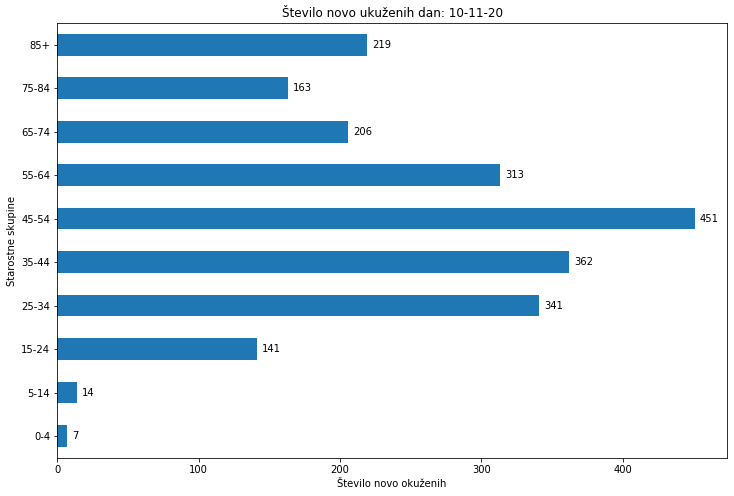

In [9]:
df = pd.read_excel('covid_data.xlsx', sheet_name='tb4')
df = df.fillna(0)
df.drop(df.head(2).index,inplace=True)
df.drop(df.tail(1).index,inplace=True)
df = df.rename(columns={'Dnevno število potrjenih primerov po spolu in starostnih skupinah': 'Datum'})
df['Datum']=pd.to_datetime(df['Datum'].astype(str), format='%Y-%m-%d %H:%M:%S')
x = df['Datum']

df = pd.read_excel('covid_data.xlsx', sheet_name='tb4')
dfs = df.loc[:,'Unnamed: 23':'Unnamed: 32']

dfs.drop(dfs.tail(1).index,inplace=True)
dfs = dfs.tail(1)
dfs = dfs.rename(columns={'Unnamed: 23': '0-4', 'Unnamed: 24':'5-14','Unnamed: 25': '15-24','Unnamed: 26': '25-34','Unnamed: 27': '35-44','Unnamed: 28': '45-54','Unnamed: 29': '55-64','Unnamed: 30': '65-74','Unnamed: 31': '75-84','Unnamed: 32': '85+'})
data = [dfs.iloc[0,0], dfs.iloc[0,1], dfs.iloc[0,2], dfs.iloc[0,3], dfs.iloc[0,4], dfs.iloc[0,5], dfs.iloc[0,6], dfs.iloc[0,7], dfs.iloc[0,8], dfs.iloc[0,9]]
labels = ['0-4', '5-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']


series = pd.Series(data)

plt.figure(figsize=(12, 8))
ax = series.plot(kind='barh')
ax.set_title('Število novo ukuženih dan: '+str(za_objavo))
ax.set_xlabel('Število novo okuženih')
ax.set_ylabel('Starostne skupine')
ax.set_yticklabels(labels)

rects = ax.patches


for rect in rects:
    
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'
  
  
    if x_value <= 0:
        space *= -0.5
        ha = 'right'

    label = "{:.0f}".format(x_value)

    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                     
                                   

plt.show()

<h1><center>Umirljivost v odstotkih za posamezne starostne skupine in spol</center></h1>

In [10]:
df = pd.read_excel('covid_data.xlsx', sheet_name='tb6', index=False)
df = df.fillna(0)

df = df.tail(1)
df = df.drop(['Dnevno število umrlih po spolu in starostnih skupinah, po datumu smrti'], axis = 1) 
df.apply(pd.to_numeric)
df = df.reset_index()
df = df.drop(['index'],axis=1)

dfp = pd.read_excel('covid_data.xlsx', sheet_name='tb4')
dfp.drop(dfp.tail(11).index,inplace=True)
dfp.drop(dfp.head(2).index,inplace=True)
dfp = dfp.sum(axis=0)
dfp.to_list()
res = list(map(int, dfp))

#Umirljivost v [%] po starostnih skupinah za moški spol.
datam = {'35-44':[100 * df.iloc[0,0]/res[4]],
        '45-54':[100 * df.iloc[0,1]/res[5]],
        '55-64': [100 * df.iloc[0,2]/res[6]],
        '65-74': [100 * df.iloc[0,3]/res[7]], 
        '75-84': [100 * df.iloc[0,4]/res[8]],
        '85+':[100 * df.iloc[0,5]/res[9]]
        }

#Umirljivost v [%] po starostnih skupinah za ženski spol.
dataf = {
        '45-54':[100 * df.iloc[0,8]/res[15]],
        '55-64': [100 * df.iloc[0,9]/res[16]],
        '65-74': [100 * df.iloc[0,10]/res[17]], 
        '75-84': [100 * df.iloc[0,11]/res[18]],
        '85+':[100 * df.iloc[0,12]/res[19]]
        }
print(res)
dataf = pd.DataFrame(data=dataf)
datam = pd.DataFrame(data=datam)


[95, 627, 2060, 2859, 3402, 3313, 2172, 1135, 721, 310, 16694, 101, 586, 1962, 2998, 4072, 4083, 2292, 981, 952, 938, 18965, 196, 1213, 4022, 5857, 7474, 7396, 4464, 2116, 1673, 1248, 35659]


<h2><center>Umirljivost v [%] po starostnih skupinah za ženski spol.</center></h2>

In [11]:
dataf

,45-54,55-64,65-74,75-84,85+
0,0.073674,0.342885,2.661431,15.494393,24.369748


<h2><center>Umirljivost v [%] po starostnih skupinah za moški spol.</center></h2>

In [12]:
datam

,35-44,45-54,55-64,65-74,75-84,85+
0,0.029394,0.090552,0.414365,2.731278,8.87656,27.096774
